In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [12]:
# load dataset
import pandas as pd


df=pd.read_csv('Data1.csv')

In [13]:
 fd=df[df['OFFRNG_ID']==194]

In [14]:
df2 = fd.groupby(['DATE'],as_index=False).agg({'NO_OF_OPRTNTY_CREATD': 'sum','NO_OF_WINS': 'sum'})

In [15]:
df2=df2.sort_values(by='DATE') 

In [16]:
df2

,DATE,NO_OF_OPRTNTY_CREATD,NO_OF_WINS
0,2016-12-31,29,107
1,2017-01-01,208,41
2,2017-01-02,558,74
3,2017-01-03,689,87
4,2017-01-04,927,108
5,2017-01-05,818,125
6,2017-01-06,15,4
7,2017-01-07,69,7
8,2017-01-08,218,19
9,2017-01-09,64,3


In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

ValueError: could not convert string to float: '2017-06-15'

In [17]:


plt.pscaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)lot(data1.Date,data1['Digital OI Wins'])

SyntaxError: invalid syntax (<ipython-input-17-ff79d44689c4>, line 4)

In [40]:
new_df=data1.iloc[:,[0,1]]

In [8]:
train_data=new_df.iloc[0:76,]
test_data=new_df.iloc[76:,]

In [9]:
train_features=train_data.iloc[:,0].values
train_labels=train_data.iloc[:,1]
test_features=test_data.iloc[:,0].values
test_labels=test_data.iloc[:,1]

In [119]:
test_features.shape,train_features.shape

((30, 1, 1), (76, 1, 1))

In [128]:
train_features=train_features.reshape(76,1,1)
test_features=test_features.reshape(30,1,1)

In [129]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [130]:
look_back=1

In [131]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [132]:
model.fit(train_features, train_labels, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 20509023.2825
Epoch 2/100
 - 0s - loss: 20507822.7060
Epoch 3/100
 - 0s - loss: 20502937.4977
Epoch 4/100
 - 0s - loss: 20496217.3159
Epoch 5/100
 - 0s - loss: 20494948.0451
Epoch 6/100
 - 0s - loss: 20493640.1189
Epoch 7/100
 - 0s - loss: 20491766.7311
Epoch 8/100
 - 0s - loss: 20484130.0747
Epoch 9/100
 - 0s - loss: 20481012.0676
Epoch 10/100
 - 0s - loss: 20478764.6889
Epoch 11/100
 - 0s - loss: 20475088.4387
Epoch 12/100
 - 0s - loss: 20471122.0662
Epoch 13/100
 - 0s - loss: 20467602.0649
Epoch 14/100
 - 0s - loss: 20458011.5840
Epoch 15/100
 - 0s - loss: 20453440.4387
Epoch 16/100
 - 0s - loss: 20449878.9624
Epoch 17/100
 - 0s - loss: 20446553.9262
Epoch 18/100
 - 0s - loss: 20443380.5954
Epoch 19/100
 - 0s - loss: 20440331.7816
Epoch 20/100
 - 0s - loss: 20437351.1568
Epoch 21/100
 - 0s - loss: 20434432.1805
Epoch 22/100
 - 0s - loss: 20431561.1293
Epoch 23/100
 - 0s - loss: 20428721.9910
Epoch 24/100
 - 0s - loss: 20425930.0526
Epoch 25/100
 - 0s - loss

In [127]:
trainPredict = model.predict(train_features)
testPredict = model.predict(test_features)

ValueError: Error when checking input: expected lstm_5_input to have shape (1, 3) but got array with shape (1, 1)

In [112]:
trainPredict

array([[63.147736],
       [63.172363],
       [63.17292 ],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],
       [63.172935],


Text(0.5, 1.0, 'Date vs Digital OI Leads')

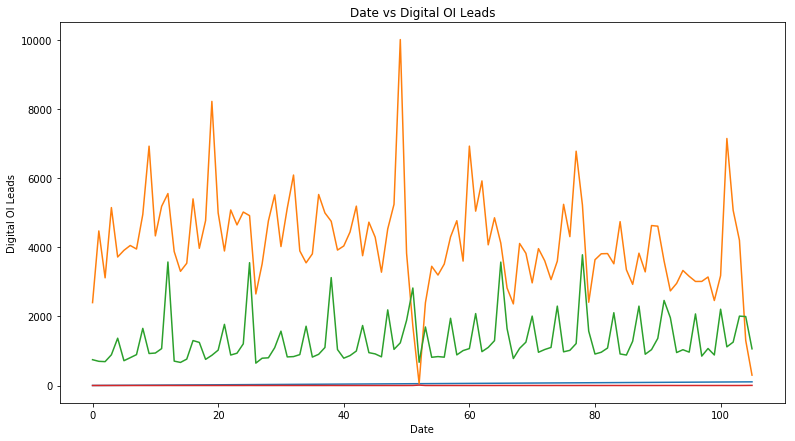

In [41]:
plt.figure(figsize=(13,7))
plt.plot(data1)
plt.xlabel('Date')
plt.ylabel('Digital OI Leads')
plt.title('Date vs Digital OI Leads')

In [115]:
dataframe[column].value_counts().index.tolist()

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

NameError: name 'dataframe' is not defined

In [97]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

NameError: name 'model1' is not defined

In [117]:
trainActual = pd.DataFrame({'Digital of Wins': trainY[0]})
trainActual.index = dates

trainPredictdf = pd.DataFrame({'Digital of Leads': trainPredict[:,0]})
trainPredictdf.index = dates

ValueError: If using all scalar values, you must pass an index